In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import seaborn as sns

df = pd.read_csv('salary.csv')

df = df.drop(['degree','otherqual','position','male'], axis=1)

# Remove Nan values
df.dropna(how='any',axis=0)

df.shape

y = df.salary

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)


(359, 7)
(155, 7)


##### [Comment]
* Risky to perform multiple tasks at same time
* Example: - why were varaibles dropped? At least check how many rows will be dropped e.g using df.isna().sum() to check how dropping values might affect your data integrity/stats
* Hard to prove/test if each step in the code does what you want it to do when it is clustered

#### Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.

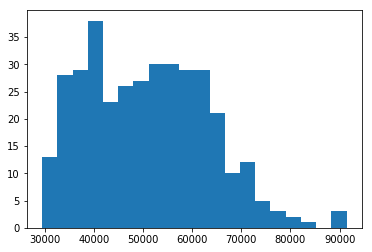

In [2]:
plt.hist(X_train['salary'],data=X_train, bins=20)

plt.show()

##### [Comment]

* Rather do exploratory analysis on entire/full dataset first, then maybe compare with your training dataset to check if full range of statistical variation in your dataset is preserved
* This can help you get an idea of how representative your training set is of your full dataset, in case you need to increase the size of your training set
* Add plot title and axis labels as well
* Have a short explanation to explain why this task was done and how it will help you to train/develop/interpret the performance of your model

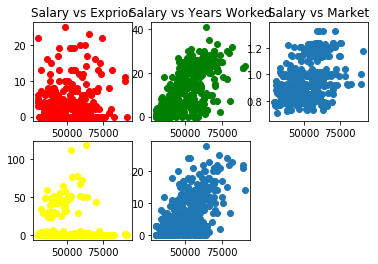

In [3]:
plt.subplot(2,3,1)

plt.scatter(X_train['salary'], X_train['exprior'], c="red")

plt.title("Salary vs Exprior")

plt.subplot(2,3,2)

plt.scatter(X_train['salary'], X_train['yearsworked'], c="green")

plt.title("Salary vs Years Worked")

plt.subplot(2,3,3)

plt.scatter(X_train['salary'], X_train['market'])

plt.title("Salary vs Market")

plt.subplot(2,3,4)

plt.scatter(X_train['salary'], X_train['yearsabs'], c="yellow")

plt.subplot(2,3,5)

plt.scatter(X_train['salary'], X_train['yearsrank'])

plt.show()

##### [Comment]

* Add labels to axis
* Careful not to have dependent variables (e.g salary) on x-axis as they might confuse reader to think your model is testing effect of salary on other variables
* Resize the figure so images fit the screen

In [4]:
X_train.describe()

,salary,exprior,yearsworked,yearsrank,market,Field,yearsabs
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,50953.117655,3.008357,13.069638,7.047354,0.945738,2.509749,7.153203
std,12462.760076,4.783285,9.422910,6.454870,0.147068,1.120799,17.348754
min,29500.000000,0.000000,0.000000,0.000000,0.710000,1.000000,0.000000
25%,40488.500000,0.000000,4.000000,2.000000,0.840000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,3.000000,1.000000
75%,60171.500000,4.000000,22.000000,11.000000,1.010000,4.000000,2.000000
max,91405.000000,25.000000,41.000000,28.000000,1.330000,4.000000,118.000000


##### [Comment]

* Add notes to make short comments about what you were trying to investigate here and what your findings were

#### Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression

In [5]:
X_train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,salary,exprior,yearsworked,yearsrank,market,Field,yearsabs
salary,1,0.099,0.64,0.61,0.37,-0.5,-0.082
exprior,0.099,1,-0.24,-0.053,-0.048,-0.029,0.18
yearsworked,0.64,-0.24,1,0.79,-0.1,-0.29,0.033
yearsrank,0.61,-0.053,0.79,1,-0.069,-0.29,0.036
market,0.37,-0.048,-0.1,-0.069,1,-0.19,-0.16
Field,-0.5,-0.029,-0.29,-0.29,-0.19,1,0.014
yearsabs,-0.082,0.18,0.033,0.036,-0.16,0.014,1


#### No multicollinearity

##### [Comment]
* What in the corr() plot leads you to conclude that there is no collinearity?

#### Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

In [12]:
# create a fitted model with all 5 features

lm = smf.ols(formula='salary ~ yearsworked + yearsrank + market + yearsabs', data=X_train).fit()

# print the coefficients
lm.params

Intercept       4475.192046
yearsworked      621.173911
yearsrank        517.383548
market         36903.128170
yearsabs         -26.208411
dtype: float64

##### [Comment]

* Why were these variables chosen to train the model?
* Say something about prediction power, based on correlation scores (stating your thresholds). E.g 'Reasonably strong positive correlation between yearsworked and salary suggested by correlation score above 50%'
* In your notes you say '5 features', but I see '4'

#### Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

In [14]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     149.2
Date:                Wed, 19 Jun 2019   Prob (F-statistic):           1.25e-74
Time:                        01:56:10   Log-Likelihood:                -3717.1
No. Observations:                 359   AIC:                             7444.
Df Residuals:                     354   BIC:                             7464.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4475.1920   2821.572      1.586      0.114   -1073.960       1e+04
yearsworked   621.1739     70.901      8.761      0.000     481.734     760.614
yearsrank     517.3835    103.202      5.013      0.000     314.417     720.350
market        3.69e+04   2799.798     13.181      0.000    3.14e+04    4.24e+04
yearsabs      -26.2084     23.614     -1.110      0.268     -72.650      20.233
==============================================================================
Omnibus:                       53.486   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.143
Skew:                           0.857   Prob(JB):                     3.61e-21
Kurtosis:                       4.832   Cond. No.                         209.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### [Comment]

* Model over summarised. Wherever possible, break model building into smaller steps that can be tweaked if necessary
* Explain results

In [20]:
lm.resid.head()

94      -671.700782
311     8870.156317
367     -834.034585
23     10991.477207
271      503.923493
dtype: float64

##### [Comment]
* Interpret results 

In [21]:
lm.fittedvalues.head()

94     41136.700782
311    61643.843683
367    69740.034585
23     51067.522793
271    52744.076507
dtype: float64

##### [Comment]

* Interpret results

#### Plot the residuals versus the predicted values using seaborn's residplot with fitted values as the x parameter, and the dependent variable as y. lowess=True.

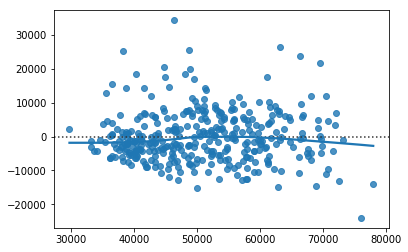

In [24]:
sns.residplot(lm.fittedvalues, lm.resid, lowess=True)

##### [Comment]

* Interpret results
* What do your results tell you about how well/badly your model performed? Examples can be:
    * Is there any insights you gained from the beginning of the data processing to suggest why the model is good or bad?
    * Suggest other data processing approaches / models that might be used?
    * Critique your own work/code, what other data can improve the model   